Повысьте точность модели по обнаружению мин (база sonar)  до 90 % на тестовой выборке. 

Можно использовать различные варианты слоев Dropout и BatchNormalization. Можно менять количество примеров в обучающей и проверочной выборках, но нельзя менять количество примеров в тестовой.


# Импорт библиотек

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras import utils
from tensorflow.keras.optimizers import Adam

from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive

%matplotlib inline

# Подключение к гугл диску

In [ ]:
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Lessons/Lesson 2/sonar.csv',
                 header=None)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Подготовка данных

In [ ]:
data = df.values
X = data[:, 0:60].astype(float)
Y = data[:, 60]
Y[Y == 'R'] = '0'
Y[Y == 'M'] = '1'
Y = Y.astype(int)

xTrain, xTest, yTrain, yTest = train_test_split(X,
                                                Y,
                                                test_size=0.2,
                                                shuffle=True)

# Вспомогательные функции

In [ ]:
def createModel(layer=0, 
                neurons=60, 
                activ="relu", 
                dropTwo=0.2, 
                dropOne=0,
                batchOne=False,
                batchTwo=False,
                ):

  model = Sequential()
  model.add(Dropout(dropOne, input_shape=(60,)))
  if batchOne:
    model.add(BatchNormalization())
  model.add(Dense(40, activation='relu'))

  for ii in range(layer): 
    model.add(Dropout(dropTwo))
    model.add(Dense(neurons, activation=activ))
    if batchTwo:
      model.add(BatchNormalization())

  model.add(Dense(1, activation='sigmoid'))

  model.compile(loss="binary_crossentropy",
                optimizer=Adam(lr=0.001),
                metrics=["accuracy"])
  
  return model

In [ ]:
def showAccuracy(history):
  plt.plot(history.history["accuracy"],
           label="Точность на обучающей выборке.")
  plt.plot(history.history["val_accuracy"],
           label="Точность на тестовой выборке.")
  
  plt.xlabel("Эпоха обучения")
  plt.ylabel("Точность модели")

  plt.legend()
  plt.show()


def showLoss(history):
  plt.plot(history.history["loss"],
           label="Ошибка на проверочной выборке.")
  plt.plot(history.history["val_loss"],
           label="Ошибка на тестовой выборке.")
  
  plt.xlabel("Эпоха обучения")
  plt.ylabel("Ошибка")

  plt.legend()
  plt.show()

# Работа с моделью

## Константы

In [ ]:
# constants
epochs = 150

## Создание модели

Epoch 1/150
22/22 [==============================] - 0s 5ms/step - loss: 0.0163 - accuracy: 0.9924 - val_loss: 1.0124 - val_accuracy: 0.8235
Epoch 2/150
 1/22 [>.............................] - ETA: 0s - loss: 0.0017 - accuracy: 1.0000

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


22/22 [==============================] - 0s 5ms/step - loss: 0.0055 - accuracy: 1.0000 - val_loss: 0.9552 - val_accuracy: 0.8235
Epoch 3/150
22/22 [==============================] - 0s 4ms/step - loss: 0.0251 - accuracy: 0.9924 - val_loss: 1.0241 - val_accuracy: 0.8235
Epoch 4/150
22/22 [==============================] - 0s 4ms/step - loss: 5.1098e-04 - accuracy: 1.0000 - val_loss: 1.0432 - val_accuracy: 0.8235
Epoch 5/150
22/22 [==============================] - 0s 5ms/step - loss: 5.3798e-04 - accuracy: 1.0000 - val_loss: 1.0532 - val_accuracy: 0.8235
Epoch 6/150
22/22 [==============================] - 0s 4ms/step - loss: 0.0133 - accuracy: 0.9924 - val_loss: 1.0572 - val_accuracy: 0.8235
Epoch 7/150
22/22 [==============================] - 0s 4ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 1.0530 - val_accuracy: 0.8235
Epoch 8/150
22/22 [==============================] - 0s 3ms/step - loss: 5.7912e-04 - accuracy: 1.0000 - val_loss: 1.0720 - val_accuracy: 0.8235
Epoch 9/150
2

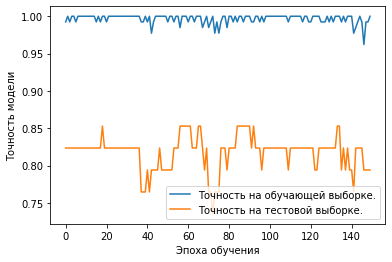

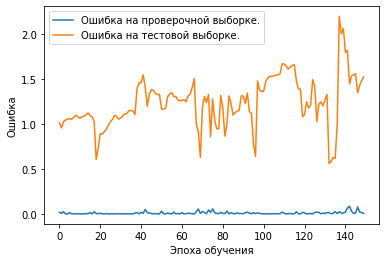

2/2 [==============================] - 0s 16ms/step - loss: 1.2747 - accuracy: 0.9048
Точнось: 0.9048%


In [ ]:

batch = 6

result = []


modelFour = createModel(layer=3, neurons=72)

history = model.fit(xTrain,
          yTrain,
          batch_size=batch,
          epochs=epochs,
          validation_split=0.2,
          verbose=1)

showAccuracy(history)
showLoss(history)

score = model.evaluate(xTest, yTest, verbose=1)
result.append(round(score[1], 4))
print(f"Точнось: {round(score[1], 4)}%")